In [1]:
# cats_and_dogs classification model with CNN
# train : 2000 images [cat(1000) + dog(1000)]  , size는 다름
# validation : 1000 images [cat(500) + dog(500)] , size는 다름

In [2]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# cats_and_dogs 데이터셋 다운로드 , Windows용
_TRAIN_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'tmp/cats_and_dogs_filtered.zip')

('tmp/cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x2309c723cd0>)

In [4]:
# Colab용 : Linux/GPU사용 
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#   -O /tmp/cats_and_dogs_filtered.zip

In [5]:
# 압축해제
local_zip = 'tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [6]:
# ! unzip /tmp/cats_and_dogs_filtered.zip /tmp

In [7]:
# 이미지 데이터 경로 설정
import os

base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


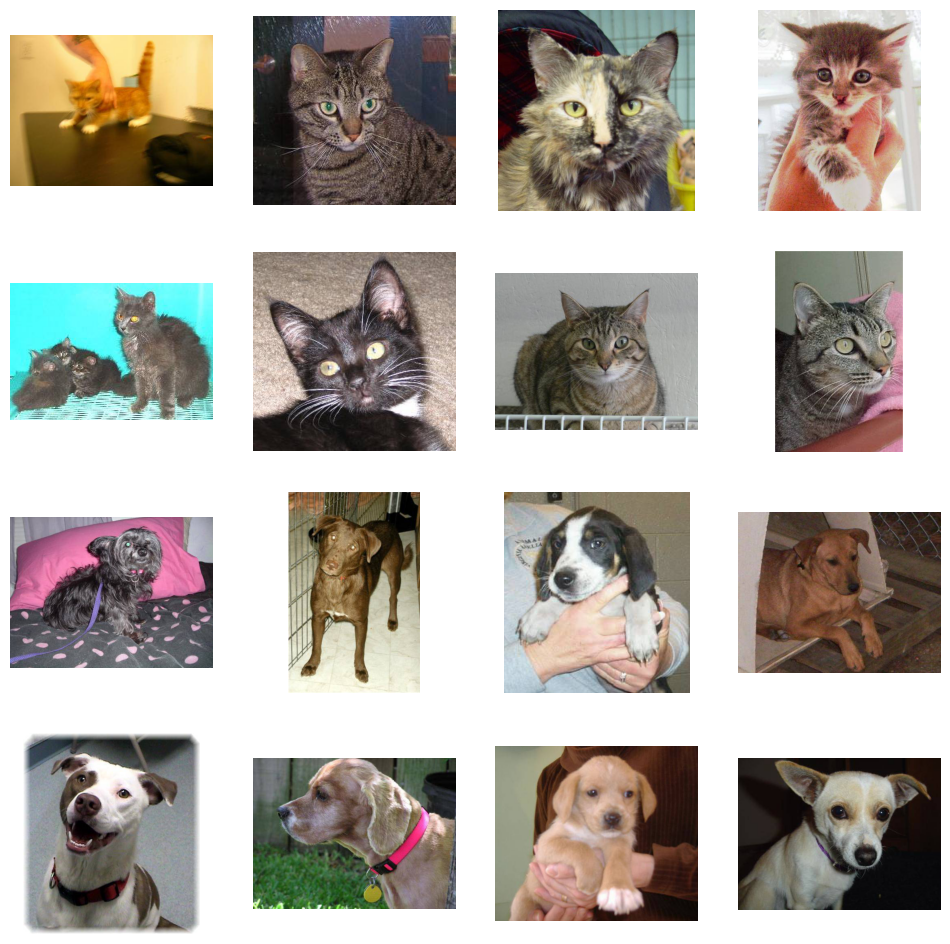

In [8]:
# 데이터 시각화
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images ,시작 인덱스

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### CNN 모델

In [9]:
# 모델 구현
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')    
])

#  RMSprop, Learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

### 데이터 전처리 : 이미지 증강(Image Augmentation)

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
type(train_datagen)

validation_datagen = ImageDataGenerator(rescale=1./255)

# train data의 generator
train_generator = train_datagen.flow_from_directory(
                  train_dir, # 이미지 파일 디렉터리 경로
                  target_size=(150,150),
                  batch_size=20,
                  class_mode='binary') # 2진 분류

# validation data의 generator

validation_generator = validation_datagen.flow_from_directory(
                  validation_dir, # 이미지 파일 디렉터리 경로
                  target_size=(150,150),
                  batch_size=20,
                  class_mode='binary') # 2진 분류

print(train_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
# 학습
history = model.fit(
            train_generator, # X
            steps_per_epoch=100, # 2000(train image number)/20(train batch_size) 생략해도 자동으로 내부에서 계산
            epochs = 15,
            validation_data=validation_generator,
            validation_steps=50) #1000/20


Epoch 1/15
100/100 [==============================] - 6s 41ms/step - loss: 0.7368 - accuracy: 0.5490 - val_loss: 0.6490 - val_accuracy: 0.5900
Epoch 2/15
100/100 [==============================] - 4s 40ms/step - loss: 0.6404 - accuracy: 0.6805 - val_loss: 0.6603 - val_accuracy: 0.6090
Epoch 3/15
100/100 [==============================] - 4s 40ms/step - loss: 0.5618 - accuracy: 0.7195 - val_loss: 0.5599 - val_accuracy: 0.7100
Epoch 4/15
100/100 [==============================] - 4s 40ms/step - loss: 0.4744 - accuracy: 0.7730 - val_loss: 0.5631 - val_accuracy: 0.7440
Epoch 5/15
100/100 [==============================] - 4s 40ms/step - loss: 0.3922 - accuracy: 0.8250 - val_loss: 0.5892 - val_accuracy: 0.7100
Epoch 6/15
100/100 [==============================] - 4s 40ms/step - loss: 0.2841 - accuracy: 0.8845 - val_loss: 0.6914 - val_accuracy: 0.7360
Epoch 7/15
100/100 [==============================] - 4s 40ms/step - loss: 0.2003 - accuracy: 0.9175 - val_loss: 0.7899 - val_accuracy: 0.7180

### 학습 결과 시각화

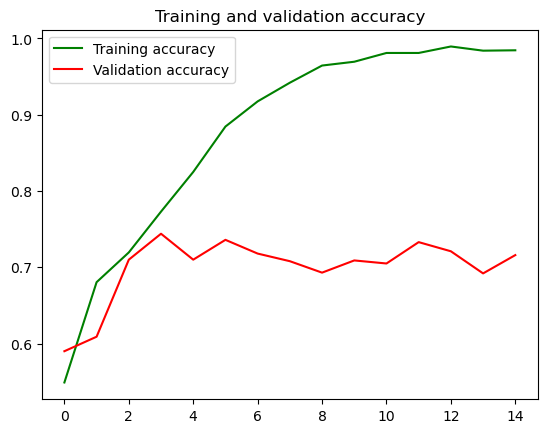

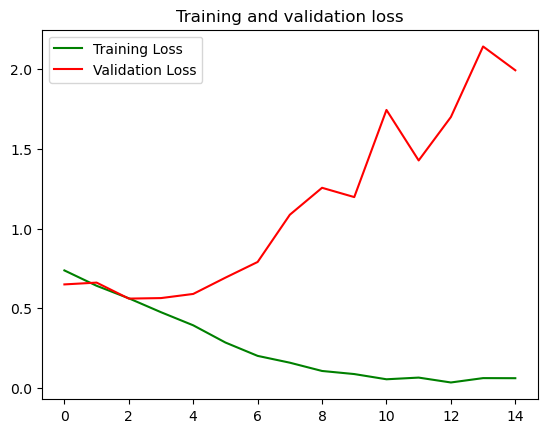

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 이미지 분류 예측

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
def image_predict(file_name):
    path = 'cats_and_dogs예측용이미지/' + file_name
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)   # 2차원 ndarray로 변환
    x = np.expand_dims(x, axis=0) # 3차원으로 변환
    images = np.vstack([x])       # 4차원으로 변환
    classes = model.predict(images, batch_size=10)
    # print(classes[0],end=' ')
    if classes[0] == 1.0:
        print(file_name ,': dog')
    else:
        print(file_name ,': cat')
image_predict('cat_01.jpg')        
image_predict('cat_02.jpg')        
image_predict('cat_03.jpg')        
image_predict('cat_04.jpg')        
image_predict('cat_05.jpg') 

image_predict('dog_01.jpg')        
image_predict('dog_02.jpg')        
image_predict('dog_03.jpg')        
image_predict('dog_04.jpg')        
image_predict('dog_05.jpg')
image_predict('cat_dog_01.jpg')   
image_predict('cat_dog_02.jpg')   
image_predict('cat_dog_03.jpg')   
image_predict('cat_dog_04.jpg')   
image_predict('cat_dog_05.jpg')

1/1 [==============================] - 0s 150ms/step
cat_01.jpg : cat
1/1 [==============================] - 0s 11ms/step
cat_02.jpg : cat
1/1 [==============================] - 0s 11ms/step
cat_03.jpg : cat
1/1 [==============================] - 0s 12ms/step
cat_04.jpg : cat
1/1 [==============================] - 0s 11ms/step
cat_05.jpg : cat
1/1 [==============================] - 0s 11ms/step
dog_01.jpg : dog
1/1 [==============================] - 0s 11ms/step
dog_02.jpg : dog
1/1 [==============================] - 0s 11ms/step
dog_03.jpg : dog
1/1 [==============================] - 0s 11ms/step
dog_04.jpg : dog
1/1 [==============================] - 0s 11ms/step
dog_05.jpg : dog
1/1 [==============================] - 0s 10ms/step
cat_dog_01.jpg : dog
1/1 [==============================] - 0s 12ms/step
cat_dog_02.jpg : cat
1/1 [==============================] - 0s 11ms/step
cat_dog_03.jpg : dog
1/1 [==============================] - 0s 12ms/step
cat_dog_04.jpg : dog
1/1 [============

### 모델 개선 : 정확도 향상

In [23]:
# 모델 구현
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')    
])
model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)      

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# train data의 generator
train_generator = train_datagen.flow_from_directory(
                  train_dir, # 이미지 파일 디렉터리 경로
                  target_size=(150,150),
                  batch_size=20,
                  class_mode='binary') # 2진 분류
                  #save_to_dir='tmp/saved_train_image')
    

# validation data의 generator
validation_generator = validation_datagen.flow_from_directory(
                  validation_dir, # 이미지 파일 디렉터리 경로
                  target_size=(150,150),
                  batch_size=20,
                  class_mode='binary') # 2진 분류
                  #save_to_dir='tmp/saved_val _image')
    
print(train_generator)
train_datagen = ImageDataGenerator(rescale=1./255)
type(train_datagen)

validation_datagen = ImageDataGenerator(rescale=1./255)



# DirectoryIterator object  , 실제 사용 시점(학습시)에 데이터 생성
# fit 호출시 1 epoch 마다 train 이미지 2000개 생성  : 15 epochs 일 경우 총 15*1027 증강 이미지 생성
# fit 호출시 1 epoch 마다 validation 이미지 1000개 생성  : 15 epochs 일 경우 총 15*256 증강 이미지 생성

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
# 학습
history = model.fit(
            train_generator, # X
            steps_per_epoch=100, # 2000(train image number)/20(train batch_size) 생략해도 자동으로 내부에서 계산
            epochs = 30,
            validation_data=validation_generator,
            validation_steps=50) #1000/20


Epoch 1/30
100/100 [==============================] - 10s 90ms/step - loss: 0.7535 - accuracy: 0.5535 - val_loss: 0.6635 - val_accuracy: 0.5950
Epoch 2/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6627 - accuracy: 0.6085 - val_loss: 0.6312 - val_accuracy: 0.6460
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6395 - accuracy: 0.6370 - val_loss: 0.6442 - val_accuracy: 0.6110
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6407 - accuracy: 0.6540 - val_loss: 0.5813 - val_accuracy: 0.6900
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6170 - accuracy: 0.6565 - val_loss: 0.5733 - val_accuracy: 0.6860
Epoch 6/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6206 - accuracy: 0.6590 - val_loss: 0.5793 - val_accuracy: 0.7040
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6072 - accuracy: 0.6775 - val_loss: 0.7820 - val_accuracy: 0.628

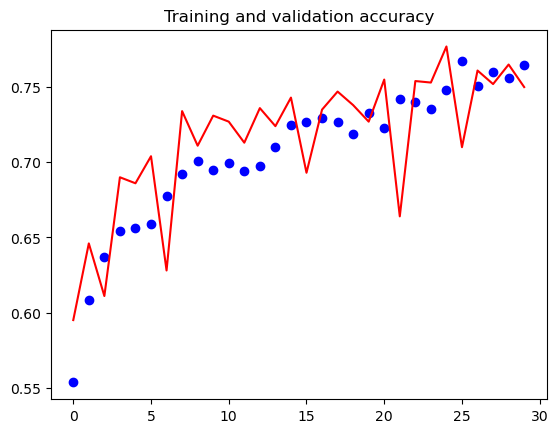

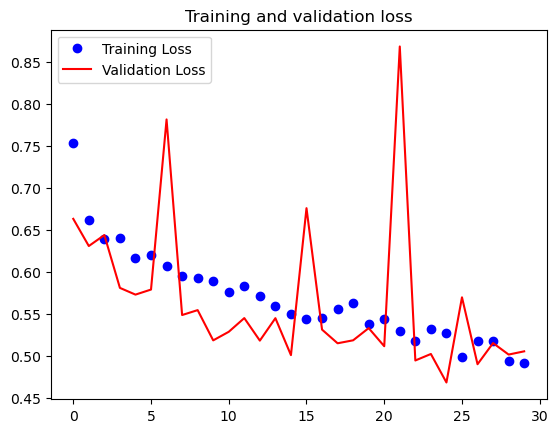

In [26]:
# 시각화
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 성능이 약간 개선됨
# 100 epochs로 학습
# 기타 : 이미지의 shape을 (300,300,3)로 할 경우 정확도 감소됨